In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
insurance_data = pd.read_csv('insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Performing basic EDA which should include the following

### a. Shape of the data

In [4]:
insurance_data.shape

(1338, 7)

### b. Datatype of each attribute

In [5]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### c. Checking the presence of missing values

In [6]:
print(insurance_data.isnull().sum())
print("*"*30)
print(insurance_data.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
******************************
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### d. 5 point summary of numerical attributes

In [7]:
##5 point summary[Median, min, max, 1QR, 3QR] of numeriacal attributes are age,bmi,children,charges

In [8]:
insurance_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

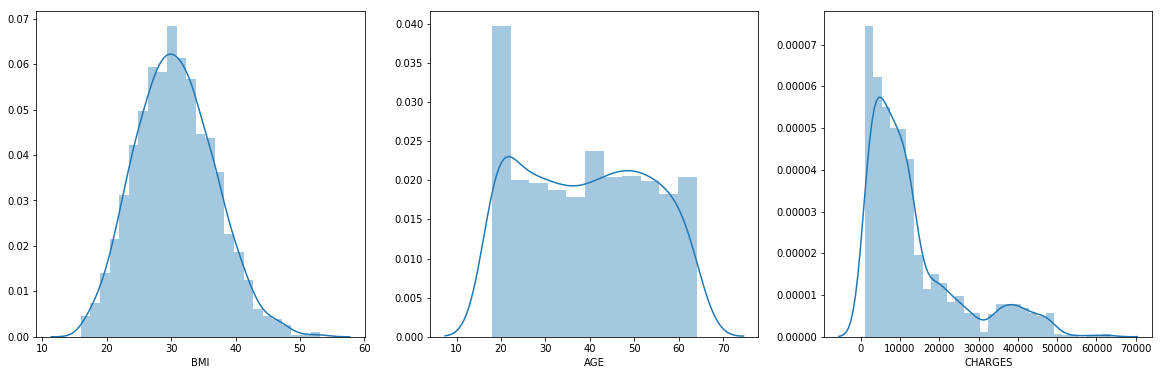

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6))

sns.distplot(insurance_data['bmi'],ax=ax1,axlabel='BMI')
sns.distplot(insurance_data['age'],ax=ax2,axlabel='AGE')
sns.distplot(insurance_data['charges'],ax=ax3,axlabel='CHARGES') 

### f.Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [10]:
import scipy.stats as stats

Skewness = pd.DataFrame({'Skewness' : [stats.skew(insurance_data.bmi),stats.skew(insurance_data.age),stats.skew(insurance_data.charges)]},
                        index=['bmi','age','charges']) 
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


### g. Checking the presence of outliers in ‘bmi’, ‘age’ and charges columns

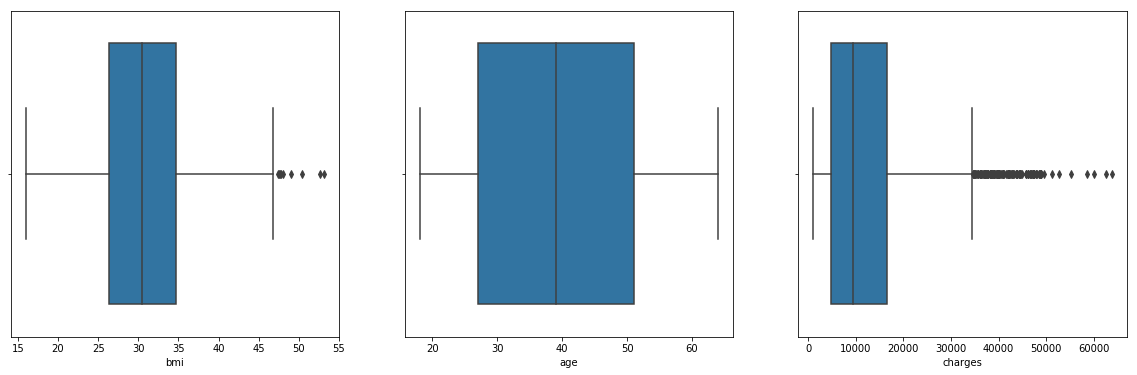

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6))

sns.boxplot(insurance_data['bmi'],ax=ax1)
sns.boxplot(insurance_data['age'],ax=ax2)
sns.boxplot(insurance_data['charges'],ax=ax3)

# WRT 
## 1. BMI we can see outliers are existing 
## 2. AGE there are no outliers
## 3. charges having more outliers , but 5 point summary is very low

### h. Distribution of categorical columns (include children)

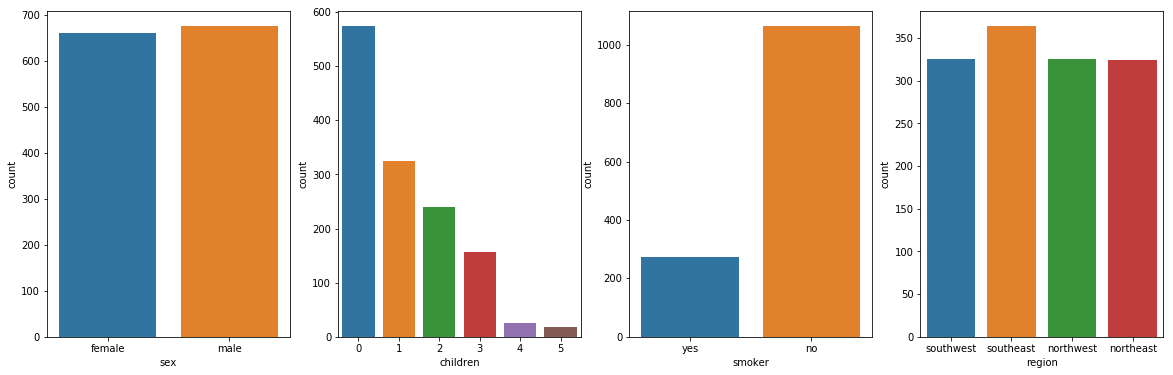

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20,6))

sns.countplot(insurance_data['sex'],ax=ax1)
sns.countplot(insurance_data['children'],ax=ax2)
sns.countplot(insurance_data['smoker'],ax=ax3)
sns.countplot(insurance_data['region'],ax=ax4)

### i.Pair plot that includes all the columns of the data frame

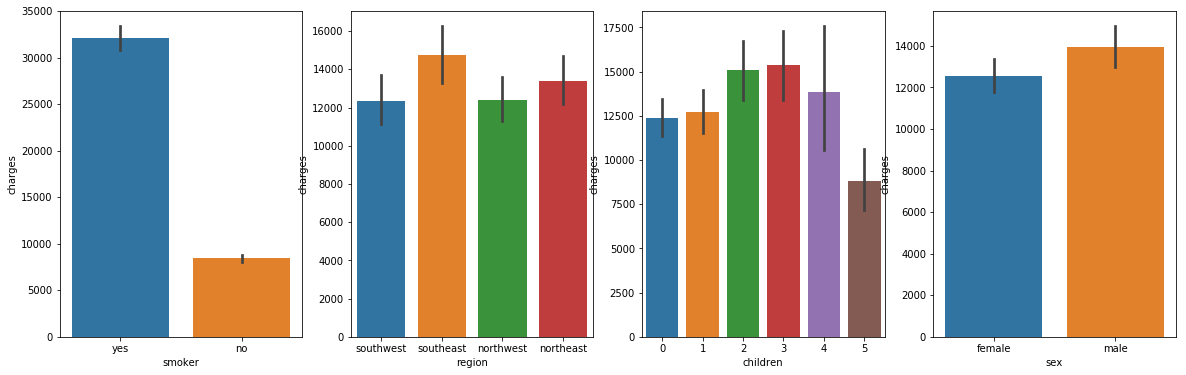

In [13]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20,6))

sns.barplot(x='smoker',y='charges',data=insurance_data, ax=ax1)
sns.barplot(x='region',y='charges',data=insurance_data, ax=ax2)
sns.barplot(x='children', y='charges', data= insurance_data, ax=ax3)
sns.barplot(x='sex', y='charges', data= insurance_data, ax=ax4)

In [14]:
# Converting the Categorical Values to Numrical using One-Hot Encoding.
insurance_data['sex'] = pd.Categorical(insurance_data['sex'])
insurance_data['children'] = pd.Categorical(insurance_data['children'])
insurance_data['region'] = pd.Categorical(insurance_data['region'])
insurance_data_dummies = pd.get_dummies(insurance_data, columns= ['sex', 'children', 'region'], prefix = 'category')

In [15]:
insurance_data_dummies.shape

(1338, 16)

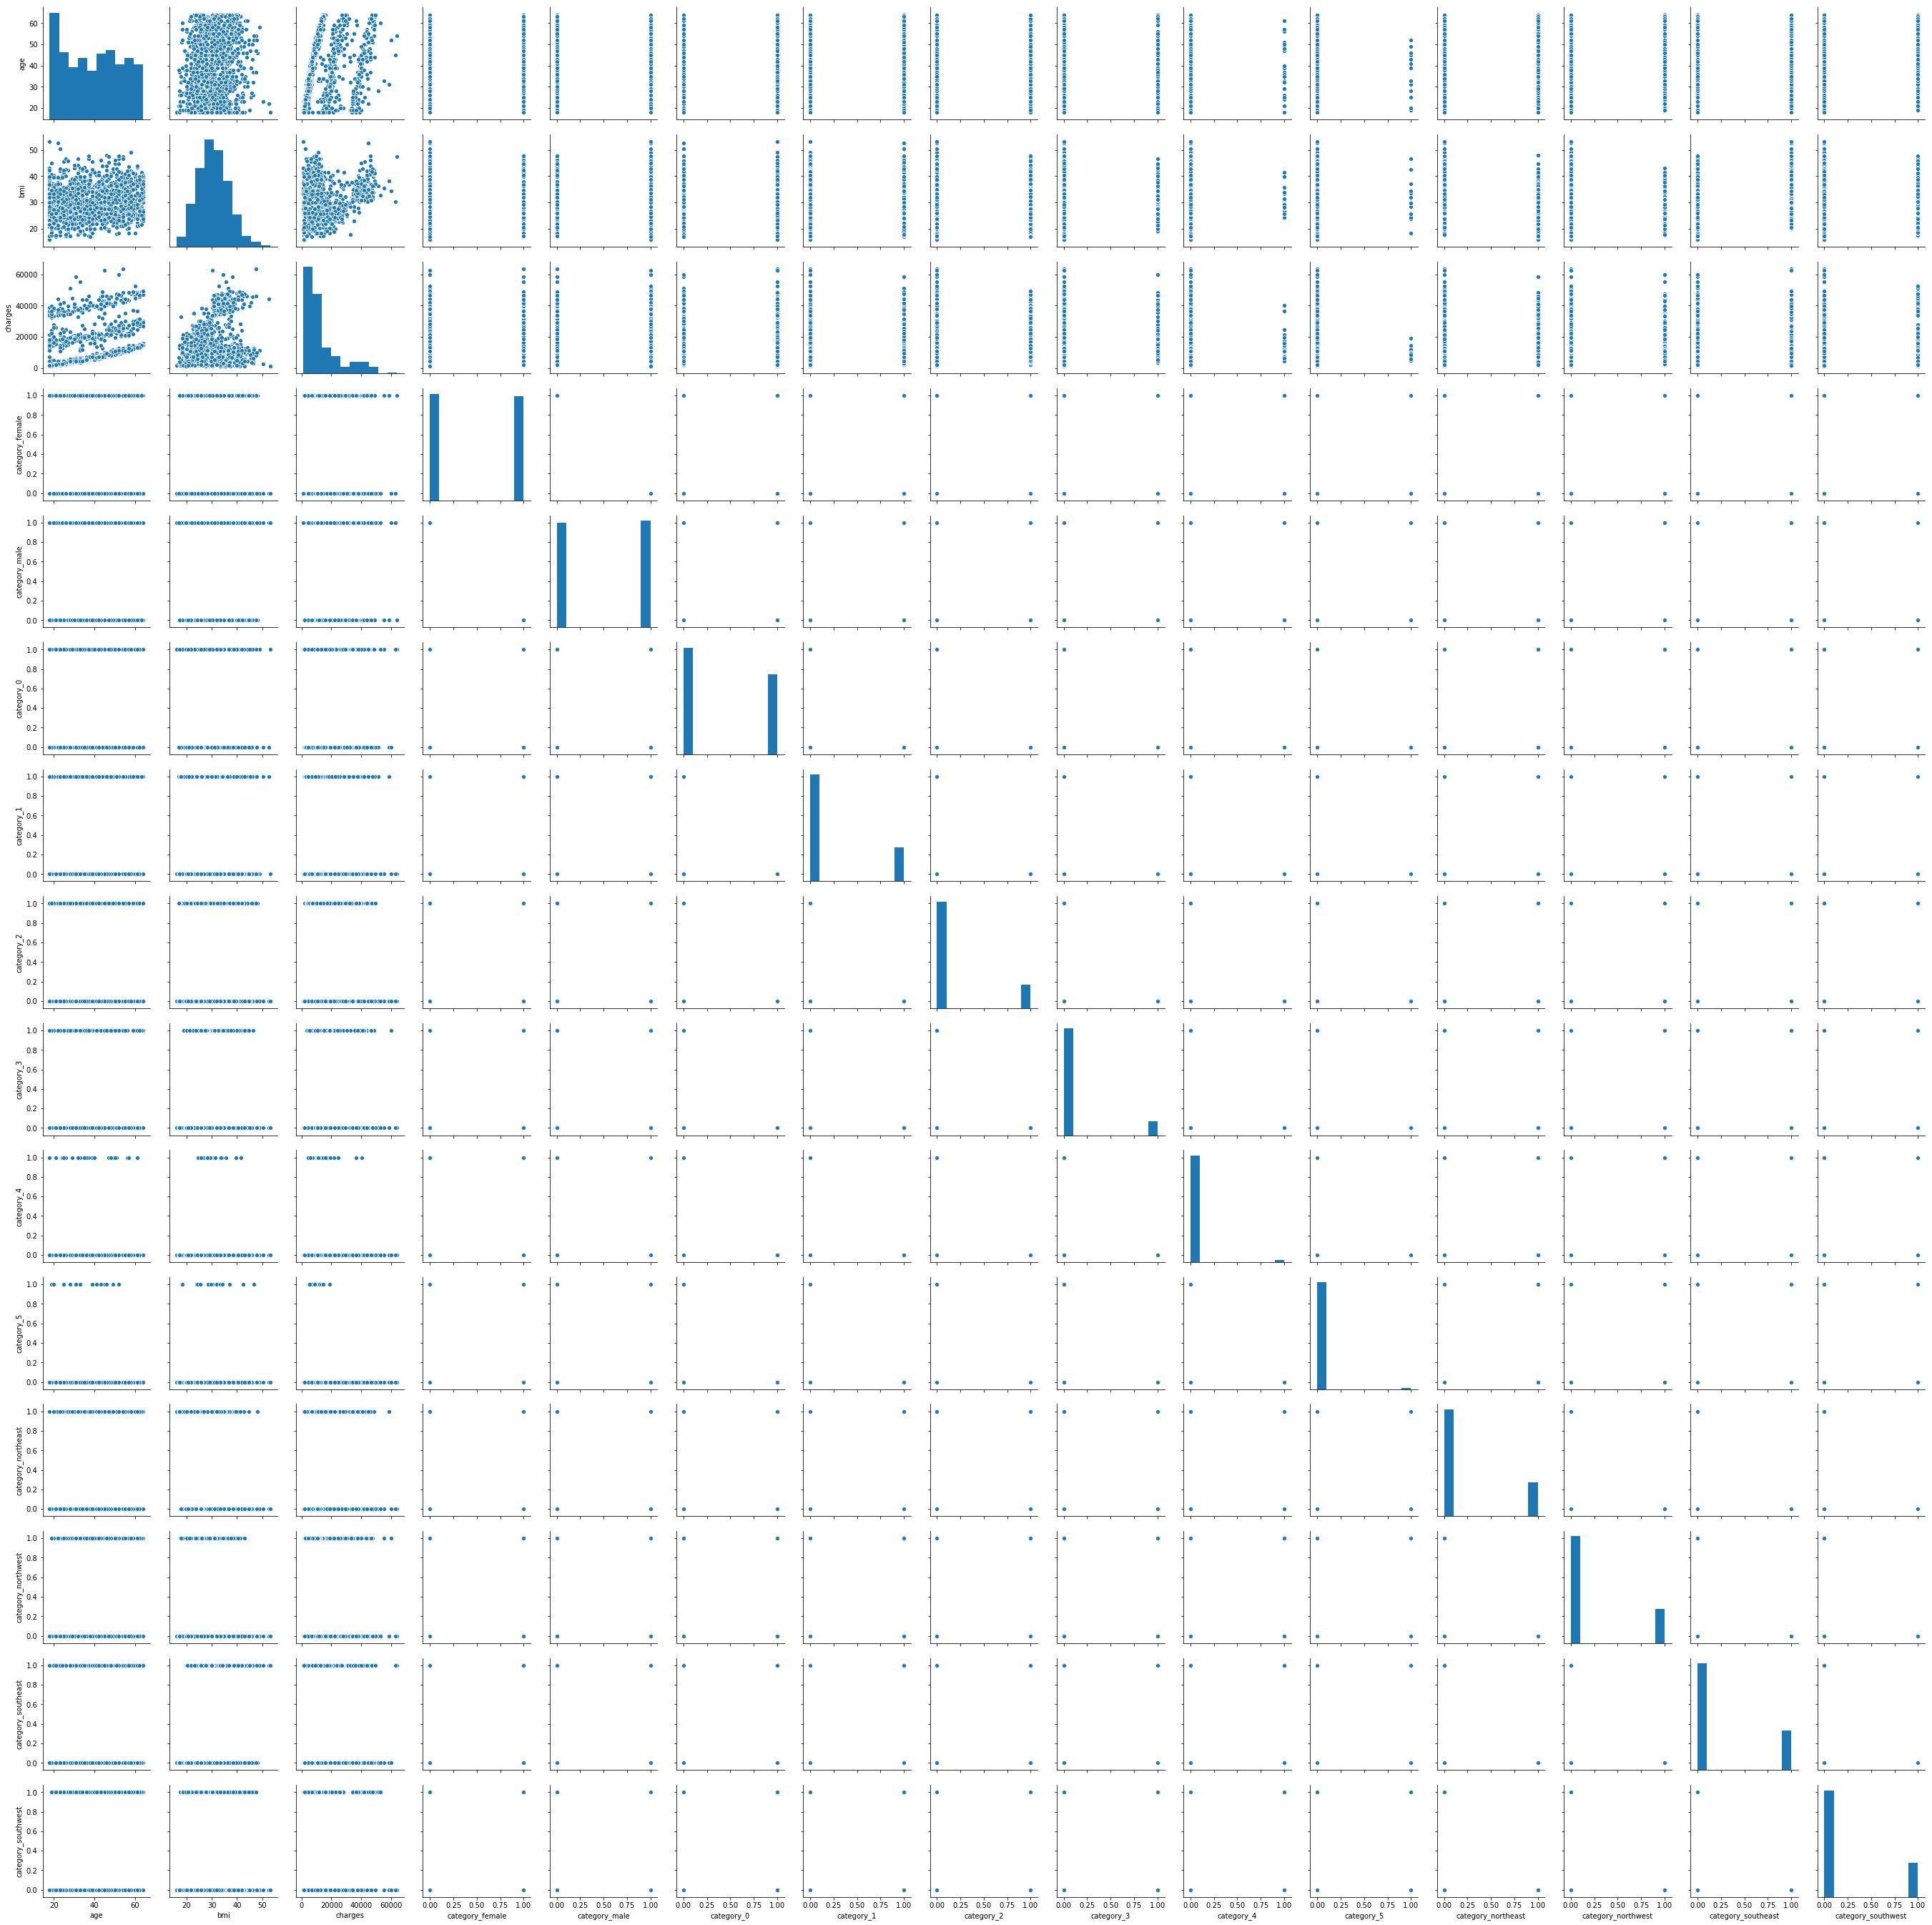

In [16]:
sns.pairplot(insurance_data_dummies)

In [17]:
insurance_data_dummies.corr()

,age,bmi,charges,category_female,category_male,category_0,category_1,category_2,category_3,category_4,category_5,category_northeast,category_northwest,category_southeast,category_southwest
age,1.000000,0.109272,0.299008,0.020856,-0.020856,-0.047075,0.009928,0.007950,0.061263,-0.002034,-0.029898,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.198341,-0.046371,0.046371,-0.016082,-0.003732,0.024136,0.001252,0.016475,-0.020275,-0.138156,-0.135996,0.270025,-0.006205
charges,0.299008,0.198341,1.000000,-0.057292,0.057292,-0.064760,-0.025180,0.069639,0.062795,0.006614,-0.043258,0.006349,-0.039905,0.073982,-0.043210
category_female,0.020856,-0.046371,-0.057292,1.000000,-1.000000,0.015111,-0.008043,0.000996,-0.003152,-0.015115,-0.011754,0.002425,0.011156,-0.017117,0.004184
category_male,-0.020856,0.046371,0.057292,-1.000000,1.000000,-0.015111,0.008043,-0.000996,0.003152,0.015115,0.011754,-0.002425,-0.011156,0.017117,-0.004184
category_0,-0.047075,-0.016082,-0.064760,0.015111,-0.015111,1.000000,-0.489962,-0.405241,-0.316034,-0.119604,-0.101218,0.028216,-0.026144,0.002866,-0.005016
category_1,0.009928,-0.003732,-0.025180,-0.008043,0.008043,-0.489962,1.000000,-0.264276,-0.206100,-0.077999,-0.066009,-0.005935,-0.019119,0.026880,-0.002846
category_2,0.007950,0.024136,0.069639,0.000996,-0.000996,-0.405241,-0.264276,1.000000,-0.170463,-0.064512,-0.054595,-0.032362,0.034996,0.003101,-0.005887
category_3,0.061263,0.001252,0.062795,-0.003152,0.003152,-0.316034,-0.206100,-0.170463,1.000000,-0.050311,-0.042577,0.005324,0.042591,-0.040243,-0.006148
category_4,-0.002034,0.016475,0.006614,-0.015115,0.015115,-0.119604,-0.077999,-0.064512,-0.050311,1.000000,-0.016113,0.012191,-0.000933,-0.022340,0.011938


## a.Do charges of people who smoke differ significantly from the people who don't?

In [18]:
print("Smoker     = ",insurance_data['charges'][insurance_data['smoker']=='yes'].describe())
print("-+"*30)
print("Non-Smoker = ",insurance_data['charges'][insurance_data['smoker']=='no'].describe())

Smoker     =  count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Non-Smoker =  count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64


In [19]:
print("IQR for smokers =", 41019.207275-20826.244213)
print("IQR for non-smokers =", 11362.887050-3986.438700)

print("Mean charges for smokers =", 32050.231832)
print("Mean charges for non-smokers =",  8434.268298)

print("Std Deviation for smokers =", 11541.547176)
print("Std Deviation for non-smokers =", 5993.781819)

IQR for smokers = 20192.963062
IQR for non-smokers = 7376.448349999999
Mean charges for smokers = 32050.231832
Mean charges for non-smokers = 8434.268298
Std Deviation for smokers = 11541.547176
Std Deviation for non-smokers = 5993.781819


In [20]:
from scipy import stats
smoker_charges = np.array(insurance_data[insurance_data.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
nonsmoker_charges = np.array(insurance_data[insurance_data.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array
tstat,pvalue = stats.ttest_ind(smoker_charges,nonsmoker_charges, equal_var=False)
print(pvalue)
print(tstat)
if pvalue<0.05:
    print("reject null hypothesis:  charges for smokers than compared with Non-Smokers")
else:
    print("accept null hypothesis: So charges for smokers &  Non-Smokers almost same or equall")

5.88946444671698e-103
32.751887766341824
reject null hypothesis:  charges for smokers than compared with Non-Smokers


# Its very clear that smokers are charged more compared to non-smokers based on SD, mean , IQR , pvalue

## Does bmi of males differ significantly from that of females?

In [21]:
print("BMI for females  = ",insurance_data['bmi'][insurance_data['sex']=='female'].describe())
print("*"*60)
print("BMI for males   = ",insurance_data['bmi'][insurance_data['sex']=='male'].describe())

BMI for females  =  count    662.000000
mean      30.377749
std        6.046023
min       16.815000
25%       26.125000
50%       30.107500
75%       34.313750
max       48.070000
Name: bmi, dtype: float64
************************************************************
BMI for males   =  count    676.000000
mean      30.943129
std        6.140435
min       15.960000
25%       26.410000
50%       30.687500
75%       34.992500
max       53.130000
Name: bmi, dtype: float64


In [22]:
male_bmi = np.array(insurance_data[insurance_data.sex == 'male'].bmi) 
female_bmi = np.array(insurance_data[insurance_data.sex == 'female'].bmi)
tstat,pvalue = stats.ttest_ind(male_bmi,female_bmi, equal_var=False)
print(pvalue)
print(tstat)
if pvalue<0.05:
    print("reject null hypothesis:  BMI is  different sex group ")
else:
    print("accept null hypothesis:  BMI is same for sex group ")

0.08992430667834876
1.697027933124022
accept null hypothesis:  BMI is same for sex group 


# By seeing the 5 point summary of BMI of both male and female. there is not much difference in BMI for male and female. Almost same.

## Is the proportion of smokers significantly different in different genders?

In [23]:
crosstab = pd.crosstab(insurance_data['sex'],insurance_data['smoker']) 
crosstab
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

In [24]:
if p_value < 0.05:  # Setting our significance level at 5%
    print("reject null hypothesis:  Smokers is  different sex group ")
else:
    print("accept null hypothesis:  Smokers is same for sex group ")

print(p_value)
print(chi)

reject null hypothesis:  Smokers is  different sex group 
0.006548143503580696
7.39291081459996


In [25]:
##Gender has an effect on smoking habits as the p_value (0.0065) < 0.05

## Is the distribution of bmi across women with no children, one child and two children, the same ?

In [26]:
print("BMI FOR WOMEN WITH NO CHILD")
print(insurance_data['bmi'][insurance_data_dummies['category_0']== 1].describe())
print('---------------------------------------------------------------')
print("BMI FOR WOMEN WITH ONE CHILD")
print(insurance_data['bmi'][insurance_data_dummies['category_1']== 1].describe())
print('---------------------------------------------------------------')
print("BMI FOR WOMEN WITH TWO CHILDREN")
print(insurance_data['bmi'][insurance_data_dummies['category_2']== 1].describe())
print('---------------------------------------------------------------')

BMI FOR WOMEN WITH NO CHILD
count    574.000000
mean      30.550296
std        6.039106
min       15.960000
25%       26.143750
50%       30.302500
75%       34.746250
max       53.130000
Name: bmi, dtype: float64
---------------------------------------------------------------
BMI FOR WOMEN WITH ONE CHILD
count    324.000000
mean      30.623148
std        6.101435
min       16.815000
25%       26.615000
50%       30.015000
75%       34.237500
max       52.580000
Name: bmi, dtype: float64
---------------------------------------------------------------
BMI FOR WOMEN WITH TWO CHILDREN
count    240.000000
mean      30.978104
std        6.509644
min       16.815000
25%       25.786250
50%       31.640000
75%       35.357500
max       48.070000
Name: bmi, dtype: float64
---------------------------------------------------------------


In [29]:
female_insurance_data = insurance_data[insurance_data['sex'] == 'female']
female_insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
13,56,female,39.820,0,no,southeast,11090.71780
16,52,female,30.780,1,no,northeast,10797.33620
20,60,female,36.005,0,no,northeast,13228.84695
21,30,female,32.400,1,no,southwest,4149.73600


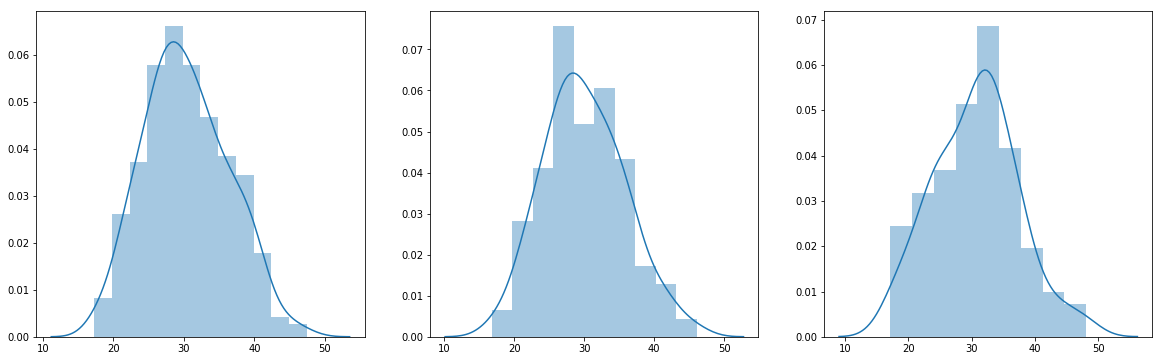

In [37]:
ins_data_0_child = pd.DataFrame(data = female_insurance_data['bmi'][female_insurance_data['children']== 0])
ins_data_1_child = pd.DataFrame(data = female_insurance_data['bmi'][female_insurance_data['children']== 1])
ins_data_2_child = pd.DataFrame(data = female_insurance_data['bmi'][female_insurance_data['children']== 2])

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6))
sns.distplot(ins_data_0_child, ax=ax1)
sns.distplot(ins_data_1_child, ax=ax2)
sns.distplot(ins_data_2_child, ax=ax3)


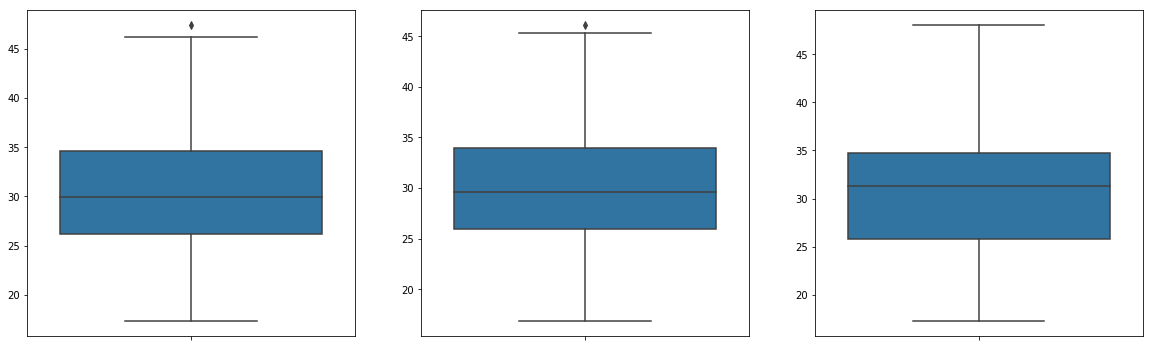

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6))

sns.boxplot(ins_data_0_child,ax=ax1,orient='v')
sns.boxplot(ins_data_1_child,ax=ax2,orient='v')
sns.boxplot(ins_data_2_child,ax=ax3,orient='v') 


In [39]:
f_stat, p_value = stats.f_oneway(ins_data_0_child,ins_data_1_child,ins_data_2_child)

In [40]:
if p_value < 0.05:  # Setting our significance level at 5%
    print("No. of children has effect on bmi" , p_value.round(4))
else:
   print("No. of children has no effect on bmi",p_value.round(4))

No. of children has no effect on bmi [0.7159]
